# Backtesting Stock Trading Strategies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn import metrics
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score                 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV 

## Web Scraping and Data Analysis

In [2]:
import yfinance as yf
ticker = '^GSPC'
start = '2014-06-01'
end = '2019-06-01'
GSPC = yf.download(ticker, start=start, end=end)
GSPC

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-02,1923.869995,1925.880005,1915.979980,1924.969971,1924.969971,2509020000
2014-06-03,1923.069946,1925.069946,1918.790039,1924.239990,1924.239990,2867180000
2014-06-04,1923.060059,1928.630005,1918.599976,1927.880005,1927.880005,2793920000
2014-06-05,1928.520020,1941.739990,1922.930054,1940.459961,1940.459961,3113270000
2014-06-06,1942.410034,1949.439941,1942.410034,1949.439941,1949.439941,2864300000
...,...,...,...,...,...,...
2019-05-24,2832.409912,2841.360107,2820.189941,2826.060059,2826.060059,2887390000
2019-05-28,2830.030029,2840.510010,2801.580078,2802.389893,2802.389893,4121410000
2019-05-29,2790.250000,2792.030029,2766.060059,2783.020020,2783.020020,3700050000


In [3]:
GSPC.to_csv('GSPC.csv')

In [4]:
data = pd.read_csv('GSPC.csv', parse_dates=['Date'], index_col='Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-02,1923.869995,1925.880005,1915.979980,1924.969971,1924.969971,2509020000
2014-06-03,1923.069946,1925.069946,1918.790039,1924.239990,1924.239990,2867180000
2014-06-04,1923.060059,1928.630005,1918.599976,1927.880005,1927.880005,2793920000
2014-06-05,1928.520020,1941.739990,1922.930054,1940.459961,1940.459961,3113270000
2014-06-06,1942.410034,1949.439941,1942.410034,1949.439941,1949.439941,2864300000
...,...,...,...,...,...,...
2019-05-24,2832.409912,2841.360107,2820.189941,2826.060059,2826.060059,2887390000
2019-05-28,2830.030029,2840.510010,2801.580078,2802.389893,2802.389893,4121410000
2019-05-29,2790.250000,2792.030029,2766.060059,2783.020020,2783.020020,3700050000


In [5]:
df = data['Close'].to_frame()
df

,Close
Date,
2014-06-02,1924.969971
2014-06-03,1924.239990
2014-06-04,1927.880005
2014-06-05,1940.459961
2014-06-06,1949.439941
...,...
2019-05-24,2826.060059
2019-05-28,2802.389893
2019-05-29,2783.020020


In [6]:
df.describe()

,Close
count,1259.000000
mean,2332.778967
std,320.174441
min,1829.079956
25%,2064.030029
50%,2201.719971
75%,2650.805054
max,2945.830078


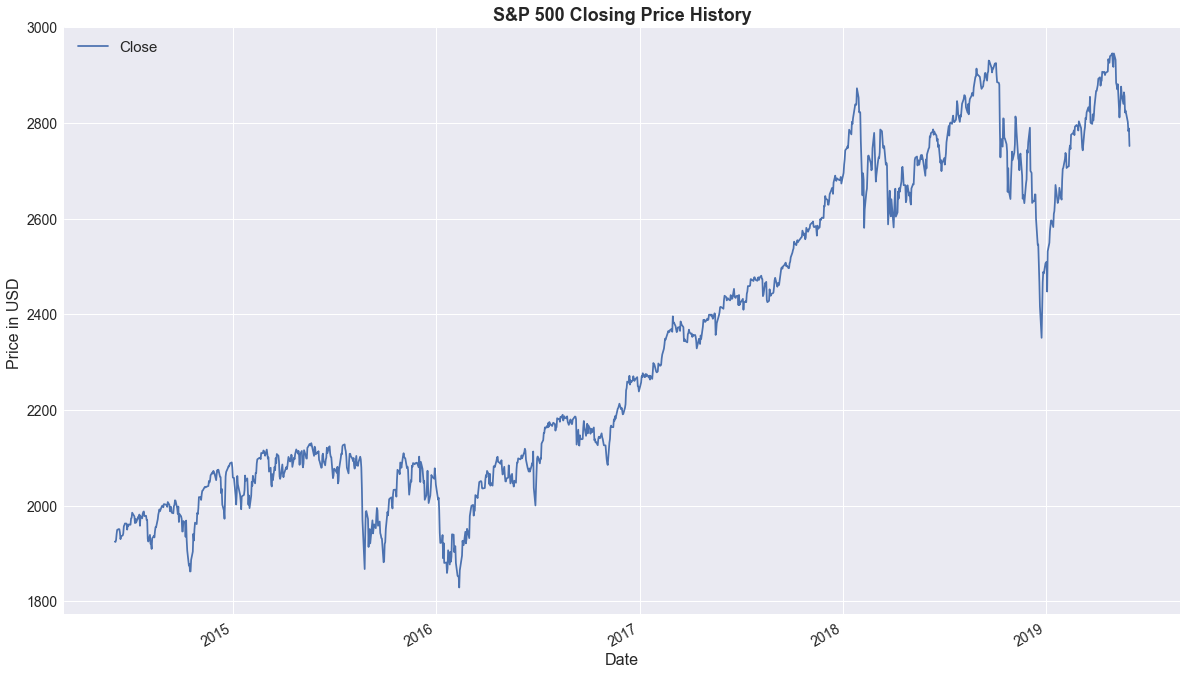

In [7]:
df.plot(figsize=(20,12), fontsize=14)
plt.title('S&P 500 Closing Price History', fontdict={'fontweight':'bold', 'fontsize':18})
plt.xlabel('Date', size=16)
plt.ylabel('Price in USD ', size=16)
plt.legend(fontsize=15)
plt.show()

In [8]:
df.rename(columns={'Close':'Price'}, inplace=True)

In [9]:
df['Return'] = np.log(df.div(df.shift()))
df.dropna(inplace=True)
df

,Price,Return
Date,,
2014-06-03,1924.239990,-0.000379
2014-06-04,1927.880005,0.001890
2014-06-05,1940.459961,0.006504
2014-06-06,1949.439941,0.004617
2014-06-09,1951.270020,0.000938
...,...,...
2019-05-24,2826.060059,0.001353
2019-05-28,2802.389893,-0.008411
2019-05-29,2783.020020,-0.006936


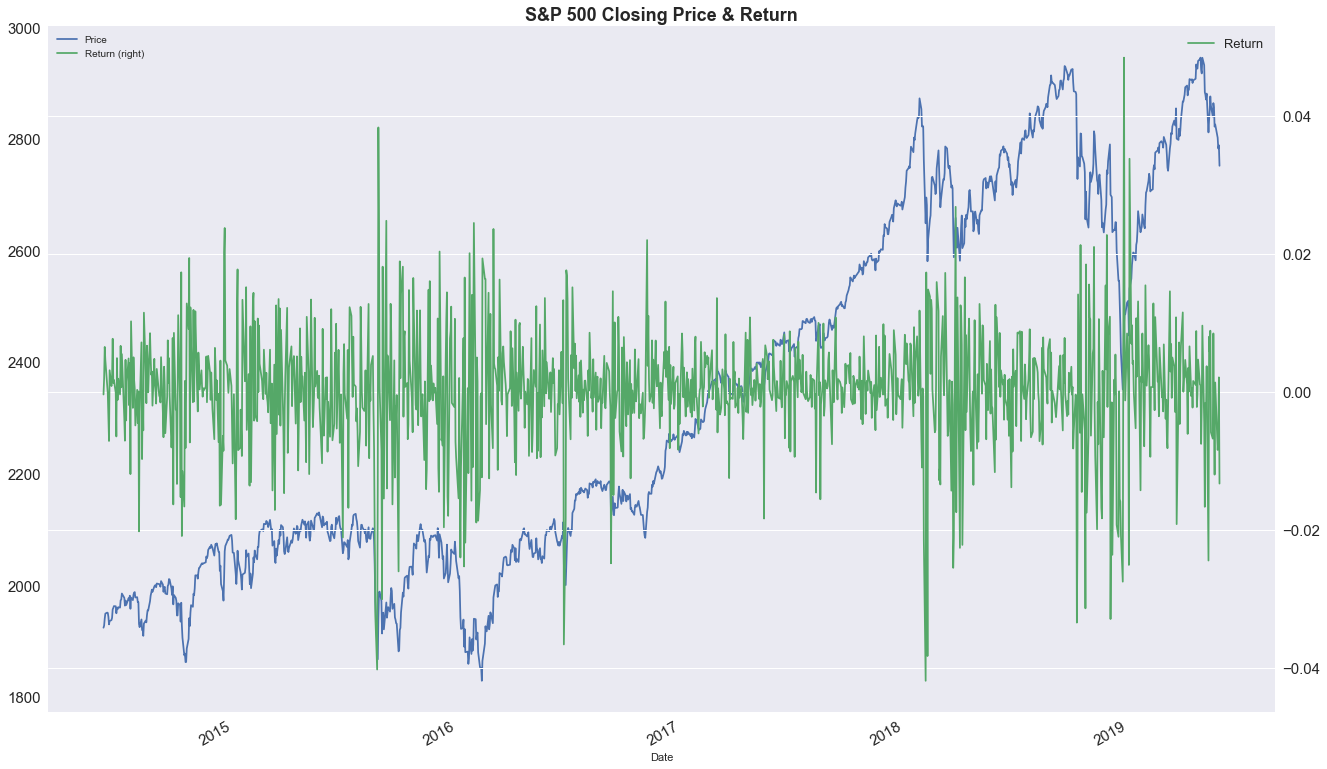

In [10]:
df.plot(figsize=(22,14), secondary_y='Return',  mark_right=True, fontsize=15)
plt.title('S&P 500 Closing Price & Return', fontdict={'fontweight':'bold', 'fontsize':18})
plt.legend(fontsize=13)
plt.show()

In [11]:
df['Direction'] = np.sign(df['Return']).astype('int')
df

,Price,Return,Direction
Date,,,
2014-06-03,1924.239990,-0.000379,-1
2014-06-04,1927.880005,0.001890,1
2014-06-05,1940.459961,0.006504,1
2014-06-06,1949.439941,0.004617,1
2014-06-09,1951.270020,0.000938,1
...,...,...,...
2019-05-24,2826.060059,0.001353,1
2019-05-28,2802.389893,-0.008411,-1
2019-05-29,2783.020020,-0.006936,-1


In [12]:
df = df.loc[df.Direction != 0].copy()

In [13]:
lags = 39
lag_cols = []
for lag in range(1, lags+1):
    col = 'Lag {}'.format(lag)                 
    df[col] = df['Return'].shift(lag)
    lag_cols.append(col)

In [14]:
df.dropna(inplace=True)
df

,Price,Return,Direction,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,...,Lag 30,Lag 31,Lag 32,Lag 33,Lag 34,Lag 35,Lag 36,Lag 37,Lag 38,Lag 39
Date,,,,,,,,,,,,,,,,,,,,,
2014-07-29,1969.949951,-0.004538,-1,0.000288,-0.004861,0.000488,0.001753,0.005004,-0.002323,0.010213,...,0.000836,0.003130,-0.007114,-0.003543,-0.000246,0.000938,0.004617,0.006504,0.001890,-0.000379
2014-07-30,1970.069946,0.000061,1,-0.004538,0.000288,-0.004861,0.000488,0.001753,0.005004,-0.002323,...,0.002170,0.000836,0.003130,-0.007114,-0.003543,-0.000246,0.000938,0.004617,0.006504,0.001890
2014-07-31,1930.670044,-0.020202,-1,0.000061,-0.004538,0.000288,-0.004861,0.000488,0.001753,0.005004,...,0.007689,0.002170,0.000836,0.003130,-0.007114,-0.003543,-0.000246,0.000938,0.004617,0.006504
2014-08-01,1925.150024,-0.002863,-1,-0.020202,0.000061,-0.004538,0.000288,-0.004861,0.000488,0.001753,...,0.001277,0.007689,0.002170,0.000836,0.003130,-0.007114,-0.003543,-0.000246,0.000938,0.004617
2014-08-04,1938.989990,0.007163,1,-0.002863,-0.020202,0.000061,-0.004538,0.000288,-0.004861,0.000488,...,0.001729,0.001277,0.007689,0.002170,0.000836,0.003130,-0.007114,-0.003543,-0.000246,0.000938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-24,2826.060059,0.001353,1,-0.011986,-0.002828,0.008460,-0.006772,-0.005854,0.008856,0.005822,...,0.000038,0.003472,-0.006086,0.001047,0.004626,0.002082,0.002146,0.000017,0.011502,0.006712
2019-05-28,2802.389893,-0.008411,-1,0.001353,-0.011986,-0.002828,0.008460,-0.006772,-0.005854,0.008856,...,0.006588,0.000038,0.003472,-0.006086,0.001047,0.004626,0.002082,0.002146,0.000017,0.011502
2019-05-29,2783.020020,-0.006936,-1,-0.008411,0.001353,-0.011986,-0.002828,0.008460,-0.006772,-0.005854,...,-0.000630,0.006588,0.000038,0.003472,-0.006086,0.001047,0.004626,0.002082,0.002146,0.000017


In [15]:
df.to_csv('df.csv')

In [16]:
df.loc[:'2018'].to_csv('train_set.csv')
df.loc['2019':].to_csv('test_set.csv')

In [17]:
df_train = pd.read_csv('train_set.csv', index_col='Date', parse_dates=['Date'])
df_train

,Price,Return,Direction,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,...,Lag 30,Lag 31,Lag 32,Lag 33,Lag 34,Lag 35,Lag 36,Lag 37,Lag 38,Lag 39
Date,,,,,,,,,,,,,,,,,,,,,
2014-07-29,1969.949951,-0.004538,-1,0.000288,-0.004861,0.000488,0.001753,0.005004,-0.002323,0.010213,...,0.000836,0.003130,-0.007114,-0.003543,-0.000246,0.000938,0.004617,0.006504,0.001890,-0.000379
2014-07-30,1970.069946,0.000061,1,-0.004538,0.000288,-0.004861,0.000488,0.001753,0.005004,-0.002323,...,0.002170,0.000836,0.003130,-0.007114,-0.003543,-0.000246,0.000938,0.004617,0.006504,0.001890
2014-07-31,1930.670044,-0.020202,-1,0.000061,-0.004538,0.000288,-0.004861,0.000488,0.001753,0.005004,...,0.007689,0.002170,0.000836,0.003130,-0.007114,-0.003543,-0.000246,0.000938,0.004617,0.006504
2014-08-01,1925.150024,-0.002863,-1,-0.020202,0.000061,-0.004538,0.000288,-0.004861,0.000488,0.001753,...,0.001277,0.007689,0.002170,0.000836,0.003130,-0.007114,-0.003543,-0.000246,0.000938,0.004617
2014-08-04,1938.989990,0.007163,1,-0.002863,-0.020202,0.000061,-0.004538,0.000288,-0.004861,0.000488,...,0.001729,0.001277,0.007689,0.002170,0.000836,0.003130,-0.007114,-0.003543,-0.000246,0.000938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,2351.100098,-0.027487,-1,-0.020803,-0.015898,-0.015515,0.000086,-0.020992,-0.019271,-0.000200,...,-0.002512,0.020987,0.006240,0.005585,-0.006337,0.010502,0.010793,0.015545,-0.006581,-0.017479
2018-12-26,2467.699951,0.048403,1,-0.027487,-0.020803,-0.015898,-0.015515,0.000086,-0.020992,-0.019271,...,-0.009242,-0.002512,0.020987,0.006240,0.005585,-0.006337,0.010502,0.010793,0.015545,-0.006581
2018-12-27,2488.830078,0.008526,1,0.048403,-0.027487,-0.020803,-0.015898,-0.015515,0.000086,-0.020992,...,-0.019898,-0.009242,-0.002512,0.020987,0.006240,0.005585,-0.006337,0.010502,0.010793,0.015545


In [18]:
X_train = df_train[lag_cols]
Y_train = df_train['Direction']

In [19]:
df_test = pd.read_csv('test_set.csv', index_col='Date', parse_dates=['Date'])
df_test

,Price,Return,Direction,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,...,Lag 30,Lag 31,Lag 32,Lag 33,Lag 34,Lag 35,Lag 36,Lag 37,Lag 38,Lag 39
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2510.030029,0.001268,1,0.008457,-0.001242,0.008526,0.048403,-0.027487,-0.020803,-0.015898,...,0.010538,-0.007596,-0.001483,-0.019898,-0.009242,-0.002512,0.020987,0.006240,0.005585,-0.006337
2019-01-03,2447.889893,-0.025068,-1,0.001268,0.008457,-0.001242,0.008526,0.048403,-0.027487,-0.020803,...,0.002221,0.010538,-0.007596,-0.001483,-0.019898,-0.009242,-0.002512,0.020987,0.006240,0.005585
2019-01-04,2531.939941,0.033759,1,-0.025068,0.001268,0.008457,-0.001242,0.008526,0.048403,-0.027487,...,-0.016783,0.002221,0.010538,-0.007596,-0.001483,-0.019898,-0.009242,-0.002512,0.020987,0.006240
2019-01-07,2549.689941,0.006986,1,0.033759,-0.025068,0.001268,0.008457,-0.001242,0.008526,0.048403,...,-0.018318,-0.016783,0.002221,0.010538,-0.007596,-0.001483,-0.019898,-0.009242,-0.002512,0.020987
2019-01-08,2574.409912,0.009649,1,0.006986,0.033759,-0.025068,0.001268,0.008457,-0.001242,0.008526,...,0.003039,-0.018318,-0.016783,0.002221,0.010538,-0.007596,-0.001483,-0.019898,-0.009242,-0.002512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-24,2826.060059,0.001353,1,-0.011986,-0.002828,0.008460,-0.006772,-0.005854,0.008856,0.005822,...,0.000038,0.003472,-0.006086,0.001047,0.004626,0.002082,0.002146,0.000017,0.011502,0.006712
2019-05-28,2802.389893,-0.008411,-1,0.001353,-0.011986,-0.002828,0.008460,-0.006772,-0.005854,0.008856,...,0.006588,0.000038,0.003472,-0.006086,0.001047,0.004626,0.002082,0.002146,0.000017,0.011502
2019-05-29,2783.020020,-0.006936,-1,-0.008411,0.001353,-0.011986,-0.002828,0.008460,-0.006772,-0.005854,...,-0.000630,0.006588,0.000038,0.003472,-0.006086,0.001047,0.004626,0.002082,0.002146,0.000017


In [20]:
X_test = df_test[lag_cols]
Y_test = df_test['Direction']

## Multiple Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, Y_train)

LinearRegression()

In [23]:
lm.coef_

array([-7.21514358, -0.15315402, -2.62419354, -0.33177916, -3.6990286 ,
        0.21335611, -3.28973424, -1.47027414, -4.17173852, -1.55032348,
        1.73512752,  3.93500668, -1.54260781, -2.86336509, -8.16131918,
        6.56196487,  5.17870981,  2.73946478, -4.98950111,  2.7661501 ,
        3.08077499,  4.2520307 ,  0.54229555,  4.28426993, -1.09959058,
        1.07185462, -4.31501879, -5.85223872, -1.23677171, -1.58837961,
       -1.84840084, -2.5696444 , -4.3833158 , -1.40120241,  4.02608106,
        0.79181017, -4.12592006, -4.61488995,  8.06979836])

In [24]:
lm.intercept_

0.055986865640847205

In [25]:
df_train['Prediction'] = lm.predict(X_train)
df_train[['Return','Prediction']]

,Return,Prediction
Date,,
2014-07-29,-0.004538,-0.041191
2014-07-30,0.000061,0.081229
2014-07-31,-0.020202,-0.019969
2014-08-01,-0.002863,0.241509
2014-08-04,0.007163,0.043256
...,...,...
2018-12-24,-0.027487,0.093578
2018-12-26,0.048403,0.119278
2018-12-27,0.008526,0.205426


In [26]:
df_train['Prediction'] = np.sign(df_train['Prediction']).astype('int')

In [27]:
df_train['Prediction'].value_counts()

 1    705
-1    409
Name: Prediction, dtype: int64

In [28]:
df_train['Direction'].value_counts()

 1    585
-1    529
Name: Direction, dtype: int64

In [29]:
accuracy_score(y_true=df_train.Direction, y_pred=df_train.Prediction)

0.5709156193895871

In [30]:
f1_score(df_train.Direction, df_train.Prediction, average=None, labels=[-1,1])

array([0.49040512, 0.62945736])

#### Backtesting

In [31]:
df_train['Strategy_ret'] = df_train['Return'] * df_train['Prediction']
df_train['Strategy'] = np.exp(df_train['Strategy_ret'].cumsum())
df_train['S&P 500'] = np.exp(df_train['Return'].cumsum())

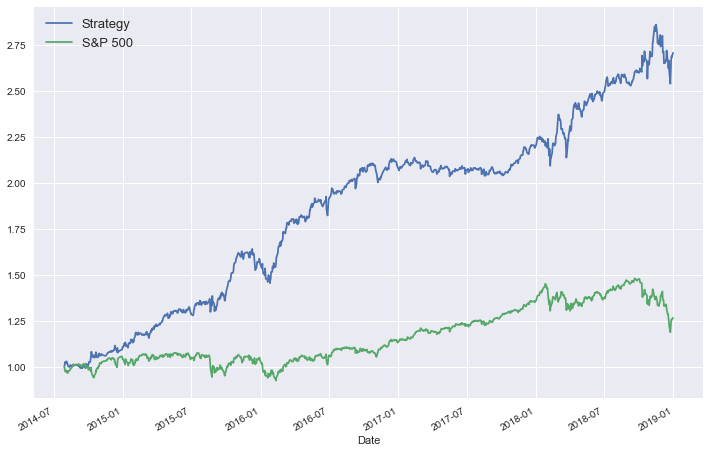

In [32]:
df_train[['Strategy','S&P 500']].plot(figsize=(12,8))
plt.legend(fontsize=13)
plt.show()

In [33]:
df_train.rename(columns={'Return':'Buy & Hold', 'Strategy_ret':'LM Strategy'}, inplace=True)

#### Annualized Return and Risk

In [34]:
def ann_rr(returns):
    output = returns.agg(['mean', 'std']).T       
    output['Annualized Return'] = output['mean'] * 252
    output['Annualized Risk'] = output['std'] * np.sqrt(252)
    output.drop(columns=['mean', 'std'], inplace=True)  
    return(output)

In [35]:
ann_rr(df_train[['Buy & Hold', 'LM Strategy']])

,Annualized Return,Annualized Risk
Buy & Hold,0.053495,0.135776
LM Strategy,0.225510,0.135072


In [36]:
df_test = pd.read_csv('test_set.csv', index_col='Date', parse_dates=['Date'])

In [37]:
df_test['Prediction'] = lm.predict(X_test)

In [38]:
df_test['Prediction'] = np.sign(df_test['Prediction'])

In [39]:
df_test['Prediction'].value_counts()

 1.0    60
-1.0    44
Name: Prediction, dtype: int64

In [40]:
accuracy_score(y_true=df_test.Direction, y_pred=df_test.Prediction)

0.5288461538461539

In [41]:
f1_score(df_test.Direction, df_test.Prediction, average=None, labels=[-1,1])

array([0.43678161, 0.59504132])

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
df_train = pd.read_csv('train_set.csv', index_col='Date', parse_dates=['Date'])

In [44]:
clf_log = LogisticRegression(C=1000, max_iter=100000, multi_class='ovr')   
clf_log.fit(X_train, Y_train)         

LogisticRegression(C=1000, max_iter=100000, multi_class='ovr')

In [45]:
df_train['Prediction'] = clf_log.predict(X_train)

In [46]:
df_train['Prediction'].value_counts()

 1    714
-1    400
Name: Prediction, dtype: int64

In [47]:
accuracy_score(y_true=df_train.Direction, y_pred=df_train.Prediction)

0.573608617594255

In [48]:
f1_score(df_train.Direction, df_train.Prediction, average=None, labels=[-1,1])

array([0.48869752, 0.6343341 ])

#### Backtesting

In [49]:
df_train['Strategy_ret'] = df_train['Return'] * df_train['Prediction']
df_train['Strategy'] = np.exp(df_train['Strategy_ret'].cumsum())
df_train['S&P 500'] = np.exp(df_train['Return'].cumsum())

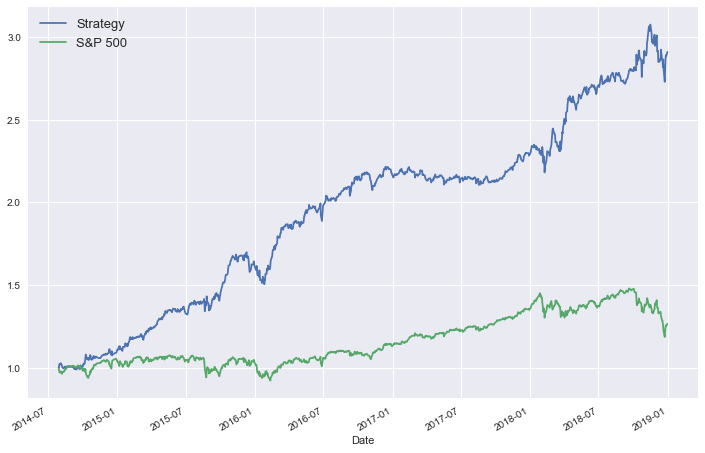

In [50]:
df_train[['Strategy','S&P 500']].plot(figsize=(12,8))
plt.legend(fontsize=13)
plt.show()

In [51]:
df_train.rename(columns={'Return':'Buy & Hold', 'Strategy_ret':'Log_M Strategy'}, inplace=True)

In [52]:
ann_rr(df_train[['Buy & Hold', 'Log_M Strategy']])

,Annualized Return,Annualized Risk
Buy & Hold,0.053495,0.135776
Log_M Strategy,0.241502,0.134962


In [53]:
df_test = pd.read_csv('test_set.csv', index_col='Date', parse_dates=['Date'])
df_test

,Price,Return,Direction,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7,...,Lag 30,Lag 31,Lag 32,Lag 33,Lag 34,Lag 35,Lag 36,Lag 37,Lag 38,Lag 39
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2510.030029,0.001268,1,0.008457,-0.001242,0.008526,0.048403,-0.027487,-0.020803,-0.015898,...,0.010538,-0.007596,-0.001483,-0.019898,-0.009242,-0.002512,0.020987,0.006240,0.005585,-0.006337
2019-01-03,2447.889893,-0.025068,-1,0.001268,0.008457,-0.001242,0.008526,0.048403,-0.027487,-0.020803,...,0.002221,0.010538,-0.007596,-0.001483,-0.019898,-0.009242,-0.002512,0.020987,0.006240,0.005585
2019-01-04,2531.939941,0.033759,1,-0.025068,0.001268,0.008457,-0.001242,0.008526,0.048403,-0.027487,...,-0.016783,0.002221,0.010538,-0.007596,-0.001483,-0.019898,-0.009242,-0.002512,0.020987,0.006240
2019-01-07,2549.689941,0.006986,1,0.033759,-0.025068,0.001268,0.008457,-0.001242,0.008526,0.048403,...,-0.018318,-0.016783,0.002221,0.010538,-0.007596,-0.001483,-0.019898,-0.009242,-0.002512,0.020987
2019-01-08,2574.409912,0.009649,1,0.006986,0.033759,-0.025068,0.001268,0.008457,-0.001242,0.008526,...,0.003039,-0.018318,-0.016783,0.002221,0.010538,-0.007596,-0.001483,-0.019898,-0.009242,-0.002512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-24,2826.060059,0.001353,1,-0.011986,-0.002828,0.008460,-0.006772,-0.005854,0.008856,0.005822,...,0.000038,0.003472,-0.006086,0.001047,0.004626,0.002082,0.002146,0.000017,0.011502,0.006712
2019-05-28,2802.389893,-0.008411,-1,0.001353,-0.011986,-0.002828,0.008460,-0.006772,-0.005854,0.008856,...,0.006588,0.000038,0.003472,-0.006086,0.001047,0.004626,0.002082,0.002146,0.000017,0.011502
2019-05-29,2783.020020,-0.006936,-1,-0.008411,0.001353,-0.011986,-0.002828,0.008460,-0.006772,-0.005854,...,-0.000630,0.006588,0.000038,0.003472,-0.006086,0.001047,0.004626,0.002082,0.002146,0.000017


In [54]:
df_test['Prediction'] = clf_log.predict(X_test)

In [55]:
df_test['Prediction'].value_counts()

 1    61
-1    43
Name: Prediction, dtype: int64

In [56]:
accuracy_score(y_true=df_test.Direction, y_pred=df_test.Prediction)

0.5192307692307693

In [57]:
f1_score(df_test.Direction, df_test.Prediction, average=None, labels=[-1,1])

array([0.41860465, 0.59016393])

### SVM

In [58]:
from sklearn import svm

In [59]:
df_train = pd.read_csv('train_set.csv', index_col='Date', parse_dates=['Date'])

In [60]:
clf_svm = svm.SVC(C=1.4, kernel='rbf', class_weight='balanced', max_iter=1000000)   

In [61]:
clf_svm.fit(X_train, Y_train)

SVC(C=1.4, class_weight='balanced', max_iter=1000000)

In [62]:
df_train['Prediction'] = clf_svm.predict(X_train)

In [63]:
df_train['Prediction'].value_counts()

 1    605
-1    509
Name: Prediction, dtype: int64

In [64]:
accuracy_score(y_true=df_train.Direction, y_pred=df_train.Prediction)

0.8563734290843806

In [65]:
f1_score(df_train.Direction, df_train.Prediction, average=None, labels=[-1,1])

array([0.84585742, 0.86554622])

#### Backtesting

In [66]:
df_train['Strategy_ret'] = df_train['Return'] * df_train['Prediction']
df_train['Strategy'] = np.exp(df_train['Strategy_ret'].cumsum())
df_train['S&P 500'] = np.exp(df_train['Return'].cumsum())

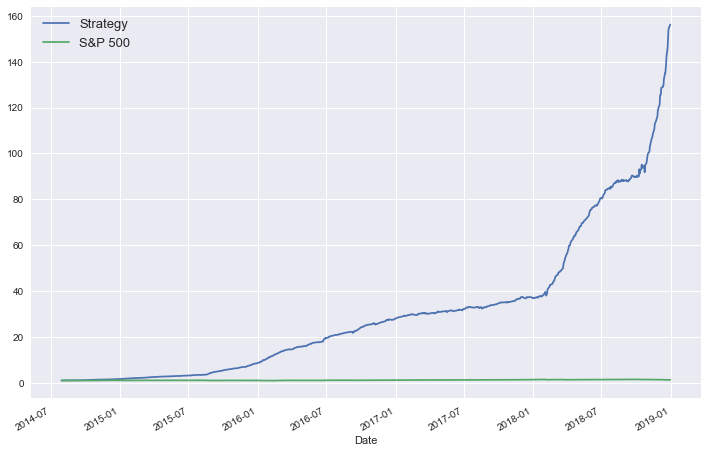

In [67]:
df_train[['Strategy','S&P 500']].plot(figsize=(12,8))
plt.legend(fontsize=13)
plt.show()

In [68]:
df_train.rename(columns={'Return':'Buy & Hold', 'Strategy_ret':'SVM Strategy'}, inplace=True)

In [69]:
ann_rr(df_train[['Buy & Hold', 'SVM Strategy']])

,Annualized Return,Annualized Risk
Buy & Hold,0.053495,0.135776
SVM Strategy,1.142612,0.115156


In [70]:
df_train['Trades'] = df_train['Prediction'].diff().fillna(0).abs()
df_train['Trades'].value_counts()

2.0    621
0.0    493
Name: Trades, dtype: int64

In [71]:
df_test = pd.read_csv('test_set.csv', index_col='Date', parse_dates=['Date'])

In [72]:
df_test['Prediction'] = clf_svm.predict(X_test)

In [73]:
df_test['Prediction'].value_counts()

 1    53
-1    51
Name: Prediction, dtype: int64

In [74]:
accuracy_score(y_true=df_test.Direction, y_pred=df_test.Prediction)

0.5769230769230769

In [75]:
f1_score(df_test.Direction, df_test.Prediction, average=None, labels=[-1,1])

array([0.53191489, 0.61403509])

In [76]:
print(classification_report(Y_test, df_test.Prediction))
print(confusion_matrix(Y_test, df_test.Prediction))  

              precision    recall  f1-score   support

          -1       0.49      0.58      0.53        43
           1       0.66      0.57      0.61        61

    accuracy                           0.58       104
   macro avg       0.58      0.58      0.57       104
weighted avg       0.59      0.58      0.58       104

[[25 18]
 [26 35]]


In [77]:
def train_svm(X_train, Y_train, X_test, Y_test):
    
    # Create a new SVM classifier
    svc = svm.SVC(kernel='rbf', class_weight='balanced', max_iter=1000000)
    
    # Dictionary of all values we want to test for C
    params_svm = {'C': np.arange(1, 5, 0.1)}  
    
    # Use gridsearch to test all values for C
    svm_gs = GridSearchCV(svc, params_svm, cv=None, return_train_score=True)      
    
    # Fit model to the training data
    svm_gs.fit(X_train, Y_train)
    
    # Save the best model
    svm_best = svm_gs.best_estimator_

    # Print the best C value
    print(svm_gs.best_params_)
    
    pred_train = svm_best.predict(X_train)
    pred_test = svm_best.predict(X_test)
    
    print(55 * '-')
    
    print('*** Train ***')
    print(classification_report(Y_train, pred_train))
    print(confusion_matrix(Y_train, pred_train))

    print(55 * '-')
    
    print('*** Test ***')
    print(classification_report(Y_test, pred_test))
    print(confusion_matrix(Y_test, pred_test))
    
    return svm_best
    
clf_svm = train_svm(X_train, Y_train, X_test, Y_test)

{'C': 1.9000000000000008}
-------------------------------------------------------
*** Train ***
              precision    recall  f1-score   support

          -1       0.88      0.85      0.87       529
           1       0.87      0.89      0.88       585

    accuracy                           0.87      1114
   macro avg       0.87      0.87      0.87      1114
weighted avg       0.87      0.87      0.87      1114

[[452  77]
 [ 63 522]]
-------------------------------------------------------
*** Test ***
              precision    recall  f1-score   support

          -1       0.47      0.53      0.50        43
           1       0.64      0.57      0.60        61

    accuracy                           0.56       104
   macro avg       0.55      0.55      0.55       104
weighted avg       0.57      0.56      0.56       104

[[23 20]
 [26 35]]


### Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
df_train = pd.read_csv('train_set.csv', index_col='Date', parse_dates=['Date'])

In [80]:
clf_dec = DecisionTreeClassifier(class_weight='balanced')
clf_dec.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced')

In [81]:
df_test = pd.read_csv('test_set.csv', index_col='Date', parse_dates=['Date'])

In [82]:
df_test['Prediction'] = clf_dec.predict(X_test)

In [83]:
df_test['Prediction'].value_counts()

-1    54
 1    50
Name: Prediction, dtype: int64

In [84]:
accuracy_score(y_true=df_test.Direction, y_pred=df_test.Prediction)

0.5480769230769231

In [85]:
f1_score(df_test.Direction, df_test.Prediction, average=None, labels=[-1,1])

array([0.51546392, 0.57657658])

## Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
clf_rf = RandomForestClassifier(class_weight='balanced')

In [88]:
clf_rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced')

In [89]:
df_test['Prediction'] = clf_rf.predict(X_test)

In [90]:
df_test['Prediction'].value_counts()

 1    63
-1    41
Name: Prediction, dtype: int64

In [91]:
accuracy_score(y_true=df_test.Direction, y_pred=df_test.Prediction)

0.4807692307692308

In [92]:
f1_score(df_test.Direction, df_test.Prediction, average=None, labels=[-1,1])

array([0.35714286, 0.56451613])

In [93]:
def train_random_forest(X_train, Y_train, X_test, Y_test):

    # Create a new random forest classifier
    rf = RandomForestClassifier()   
    
    # Dictionary of all values we want to test for n_estimators
    params_rf = {'n_estimators':np.arange(100, 210, 10)} 
    
    # Use gridsearch to test all values for n_estimators
    rf_gs = GridSearchCV(rf, params_rf, cv=5)
    
    # Fit model to the training data
    rf_gs.fit(X_train, Y_train)
    
    # Save the best model
    rf_best = rf_gs.best_estimator_
    
    # Print the best n_estimators value
    print(rf_gs.best_params_)
    
    pred_train = rf_best.predict(X_train)
    pred_test = rf_best.predict(X_test)
    

    print('*** Test ***')
    print(classification_report(Y_test, pred_test))
    print(confusion_matrix(Y_test, pred_test))
    
    return rf_best
    
clf_rf = train_random_forest(X_train, Y_train, X_test, Y_test)

{'n_estimators': 160}
*** Test ***
              precision    recall  f1-score   support

          -1       0.36      0.37      0.36        43
           1       0.54      0.52      0.53        61

    accuracy                           0.46       104
   macro avg       0.45      0.45      0.45       104
weighted avg       0.47      0.46      0.46       104

[[16 27]
 [29 32]]
